In [165]:
import pandas as pd
import plotnine as p9
import statsmodels as sm
import statsmodels.stats.power as pwr
from scipy import stats
import math

---
**Apendix:**  
* [How to apply statistical tests to different types of data (4:05)](https://www.youtube.com/watch?v=I10q6fjPxJ0)
* [Choosing a Statistical Test](https://www.youtube.com/watch?v=UaptUhOushw)
* [Signal to Noise Ratio](https://www.youtube.com/watch?v=7W11BOlM02I&list=PLn0OLiymPak1Ch2ce47MqwpIw0x3m6iZ7)
---

## The Basics of Statistical Hypothesis Testing
In this chapter, you will learn how to explore your data and ask meaningful questions. Then, you will discover how to answer these question by using your first statistical hypothesis tests: the t-test, the Chi-Square test, the Fisher exact test, and the Pearson correlation test.

### Your first t-test
Now you will perform your first statistical test! We want to compare the mean heights in cm of the Sample_A group with a given value. We want to see whether the mean weight of the people in this sample is significantly different from the chosen cut-off point of 65 kg. You'll use a one-sample t-test, which allows you to compare the mean of a sample with a chosen value. You'll perform this test on the sample provided versus the crucial value of 65 kg, and test its significance by comparing the value of alpha to the p-value. scipy.stats has been loaded into the workspace as stats.

In [32]:
Sample_A = [54.2, 66.4, 66.9, 64.4, 71.1]

# Perform t-test and print result
t_result=stats.ttest_1samp(Sample_A, 65)
print(t_result)

# Test significance
alpha= 0.05
if (t_result.pvalue < alpha):
    print("mean value of Sample A differs from given value")
else:
    print("No significant difference found")

Ttest_1sampResult(statistic=-0.14187430361917347, pvalue=0.8940381290746852)
No significant difference found


### One-sample t-test
In this exercise, you will perform a one-sample t-test using the ttest_1sample() function. Using eudata, a dataset of country-level statistics, you'll be looking at the sex ratios found in the population of European countries. You'll use a one sample t-test to determine if the mean sex ratio found among European countries differs significantly from 50-50. First, you'll make some plots, then you'll perform your test. pandas, scipy.stats, and plotnine have been loaded into the workspace as pd, stats, and p9.

In [43]:
eudata = pd.read_csv('datasets/eudata.csv')

In [44]:
# Create the density plot
(p9.ggplot(eudata)+ p9.aes('Sex_ratio')+ p9.geom_density(alpha=0.5))

# Perform the one-sample t-test
t_result= stats.ttest_1samp(eudata.Sex_ratio, 100)
print(t_result)

# Test significance
alpha = 0.05
if t_result[1] < alpha:
    print("Sex ratios are significantly biased")
else:
    print("No significant bias found")

Ttest_1sampResult(statistic=-5.5863751832137805, pvalue=1.2013672443567394e-06)
Sex ratios are significantly biased


### Two-sample t-test <a id="0"></a>
Now we'll compare two sets of samples. Again, we'll be looking at the Sex_ratio (number of males per 100 females) found in different countries, but this time we're going to compare the Sex_ratio of European countries with Asian countries. Does the mean sex ratio differ between the two continents? A two-sample t-test can tell us whether the means of two samples differ significantly. The dataset is provided as euasdata. pandas, scipy.stats, and plotnine have been loaded into the workspace as pd, stats, and p9. You'll do some exploratory data analysis, then compare the groups via a statistical test.

In [57]:
euasdata = pd.read_csv('data/euasdata1.csv')

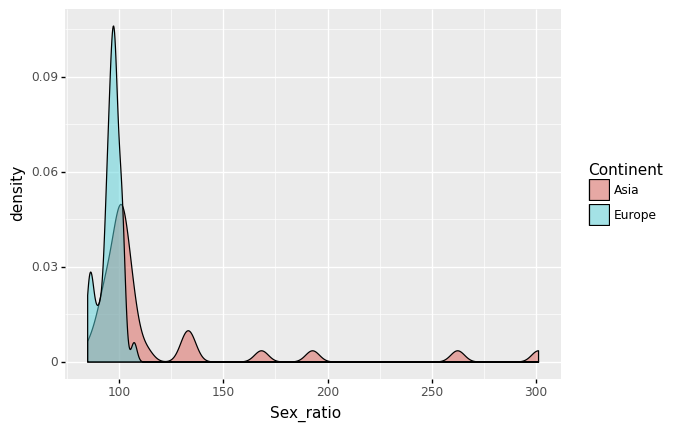

<ggplot: (345708135)>
Ttest_indResult(statistic=-3.158577029594624, pvalue=0.0022464114650919908)
Europe and Asia have different mean sex ratios


In [58]:
# Create the density plot
print(p9.ggplot(euasdata)+ p9.aes('Sex_ratio', fill="Continent")+ p9.geom_density(alpha=0.5))

# Create two arrays
Europe_Sex_ratio = euasdata[euasdata.Continent == "Europe"].Sex_ratio
Asia_Sex_ratio = euasdata[euasdata.Continent == "Asia"].Sex_ratio

# Perform the two-sample t-test
t_result= stats.ttest_ind(Europe_Sex_ratio, Asia_Sex_ratio)
print(t_result)

# Test significance
alpha= 0.05
if (t_result.pvalue < alpha):
    print("Europe and Asia have different mean sex ratios")
else: print("No significant difference found")

### Chi-square test - One Categorical
In this exercise, you will be working with the Olympics dataset. Here, we're going to look at the sex ratio of the American Olympic squads. Is a bias present? That is to say, does the ratio of male to female athletes significantly depart from 50-50? To test this, you'll need to perform a Chi-square test on the Sex data. Data on American athletes is provided as athletes. pandas, and plotnine have been loaded into the workspace as pd and p9.

In [78]:
athletes = pd.read_csv('data/athletes.csv')

In [81]:
# Extract sex ratio
sexratio = athletes['Sex'].value_counts()

# Perform Chi-square test
chi= stats.chisquare(sexratio)
print(chi)

# Test significance
alpha= 0.05
if chi.pvalue < alpha:
    print("Difference between sexes is statistically significant")
else:
    print("No significant difference between sexes found")

Power_divergenceResult(statistic=568.4776119402985, pvalue=1.2035877899749622e-125)
Difference between sexes is statistically significant


### Fisher's exact test - Two Categorical
Now, you'll work with the Olympics dataset to look at the relative success of the American swimming and athletics teams. Whether each athlete received a medal is coded as True or False in the MedalTF column of athletes. Do a larger proportion of swimming or athletics participants come home with medals? A Fisher exact test is a useful way to compare proportions of samples falling into discrete categories. To test this, you'll need to perform a Fisher exact test on MedalTF in relation to Sport. pandas and plotnine have already been imported as pd and p9.

N0: test whether the proportion of medal winners differs significantly between Sports.

In [82]:
# Create a table of cross-tabulations
table = pd.crosstab(athletes.MedalTF, athletes.Sport)
print(table)

# Perform the Fisher exact test
fisher = stats.fisher_exact(table, alternative='two-sided')
print(fisher)

# Is the result significant?
alpha = 0.05
if fisher[1] < alpha:
    print("Proportions of medal winners differ significantly")
else:
    print("No significant difference in proportions of medal winners found")

Sport    Athletics  Swimming
MedalTF                     
False         2131       556
True          1071      1066
(3.8148405645231716, 2.4220956742371155e-101)
Proportions of medal winners differ significantly


### Pearson correlation
In this exercise, you will be using the Olympic athletes dataset and focusing on just one event, the men's 100 meter running race. The dataset is provided in your workspace as athletes. You're going to be looking at how the weights of competitors have changed over time. A Pearson correlation test allows us to determine whether a linear relationship exists between two variables. pandas, scipy.stats, and plotnine have been loaded into the workspace as pd, stats, and p9, respectively. First, you'll make some plots, then you'll see how the sprinters' weights have changed over time.

In [85]:
athletes_no_missing = pd.read_csv('data/athletes_no_missing.csv')

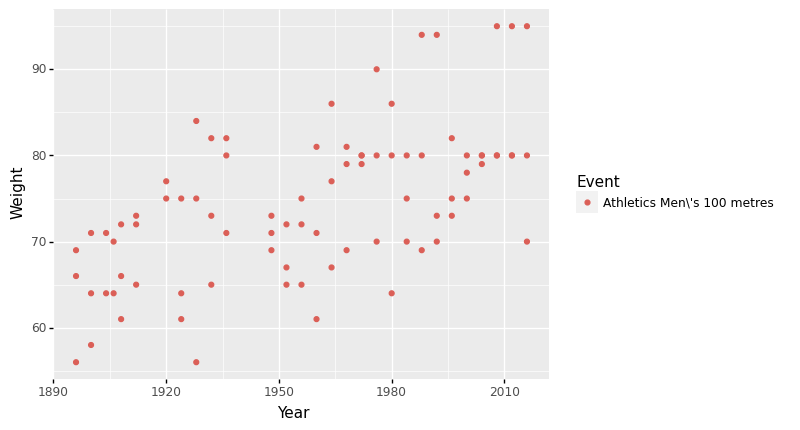

<ggplot: (347913695)>
(0.5906303581794903, 3.344238413739e-09)
Weights and year are significantly correlated


In [91]:
# Create the scatterplot
print(p9.ggplot(athletes_no_missing)+ p9.aes('Year', 'Weight', color='Event')+  p9.geom_point())

# Run the correlation test
pearson = stats.pearsonr(athletes_no_missing.Weight, athletes_no_missing.Year)
print(pearson)

# Test if p-value is bigger or smaller than alpha
alpha = 0.05
if pearson[1] < alpha:
    print("Weights and year are significantly correlated")
else:
    print("No significant correlation found")

---

## Design Considerations in Experimental Design
In this chapter, you will learn how to examine and multiple factors at once, controlling for the effect of confounding variables and examining interactions between variables. You will learn how to use randomization and blocking to build robust tests and how to use the powerful ANOVA method.

### Exploring confounding variables
In this exercise, you're going to do some exploratory data analysis (EDA) to better understand confounding variables. Once again, we'll be looking at trends in weights of Olympic athletes from the athletes DataFrame. `We are interested in possible differences between the weights of athletes from different countries`, which may be more difficult to determine than it seems.

**Are apparent differences between countries due to real differences between the countries, or might they be caused by something else within the data?** Exploratory data analysis will help! The athletes DataFrame contains details about Olympic athletes from Ethiopia and Kenya. pandas and plotnine have been loaded into the workspace as pd and p9.

In [97]:
athletes_teams = pd.read_csv('data/athletes_teams.csv')

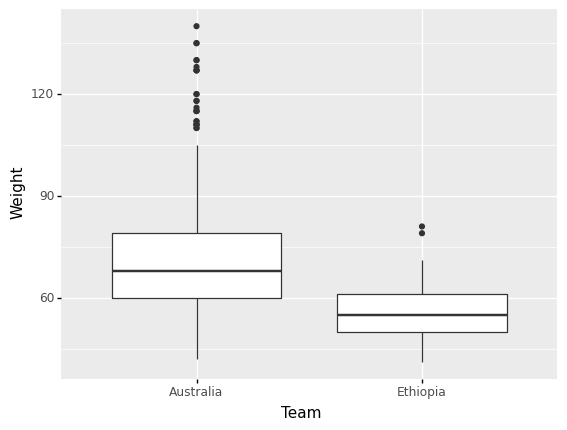

<ggplot: (348535580)> 

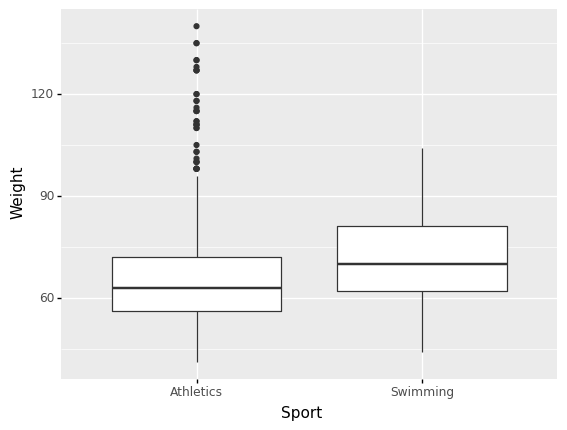

<ggplot: (349544183)>
Sport      Athletics  Swimming
Team                          
Australia        856      1045
Ethiopia         271         4


In [98]:
# Create boxplot of Team versus Weight
plotTeamVWeight = p9.ggplot(athletes_teams)+ p9.aes('Team','Weight')+ p9.geom_boxplot()

# Create boxplot of Sport versus Weight
plotSportVWeight = p9.ggplot(athletes_teams)+ p9.aes('Sport','Weight')+ p9.geom_boxplot()
      
# Print plots 
print(plotTeamVWeight, plotSportVWeight)

# Create crosstabulation & print table
table = pd.crosstab(athletes_teams.Team, athletes_teams.Sport)
print(table)

**Question**  
Which of the following interpretations best fits the available data?
1. Neither Sport nor Team are related to Weight.
2. Both Sport and Team affect Weight, but these effects are surely unrelated.
3. Sport, but not Team, seems to affect Weight.
4. Both Sport and Team may effect Weight, but this effect may be driven by different proportions of athletes from different disciplines in the two Teams.

Answer: 4. Confounding variables can be tricky to root out. We're going to need better methods to answer such questions.

### Finding confounding variables
We're going to explore the topic of confounding a little more. Returning to our UN demographic data, we'll again be looking to make a comparison between countries in Asia and Europe. Here `we're interested in comparing Asian and European life expectancy`, using a DataFrame provided as euasdata. For each Country, you have three figures available: their GDP per capita in USD (GDP_per_cap), their female life expectancy (Life_exp) and their unemployment rate (Unemployment). `Which of these factors may be confounding?*` You'll need to create some plots in order to explore these issues. pandas and plotnine have been loaded into the workspace as pd and p9.

(*) Is it GDP_per_cap that influences both Life_exp and unemployment? Is it Life_exp that influence the other two? Or maybe the unemployment is the confounding?

In [66]:
euasdata = pd.read_csv('data/euasdata2.csv')

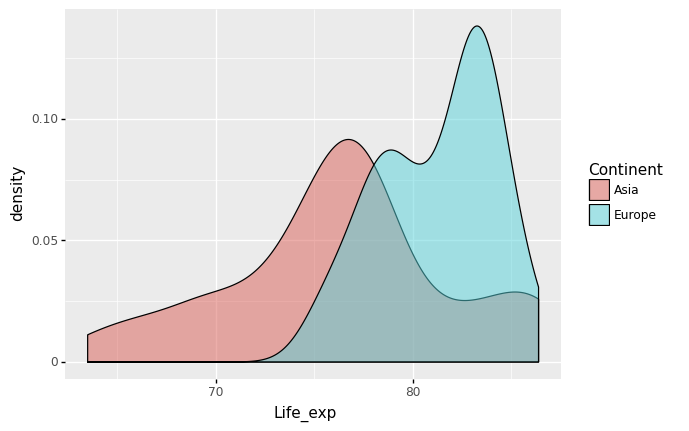

<ggplot: (345708060)> 

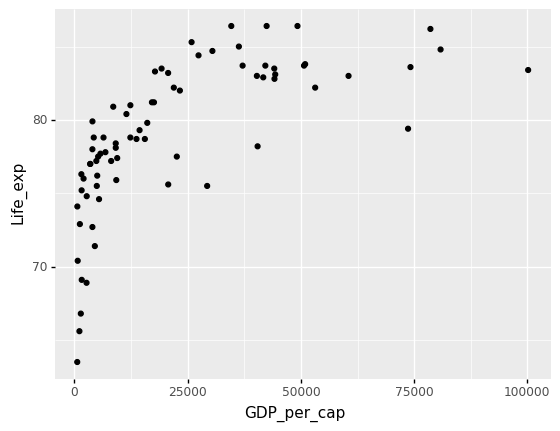

<ggplot: (342513351)> 

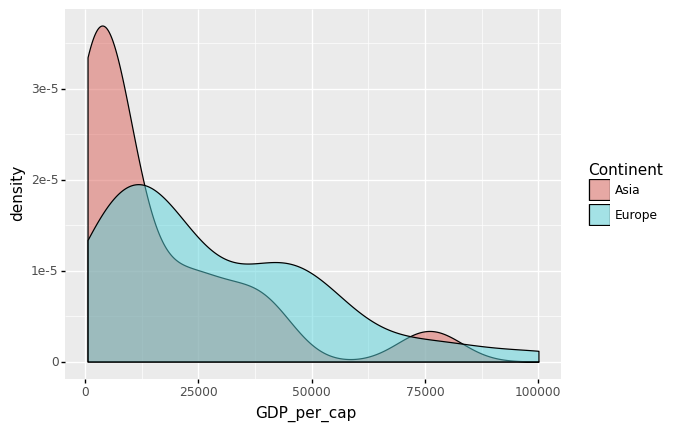

<ggplot: (344773828)>


In [67]:
# This first plot is what is being analized primarly
# Life expectancy density plot
plotLifeVCont = p9.ggplot(euasdata) + p9.aes(x='Life_exp', fill='Continent') +p9.geom_density(alpha=0.5) # FILL

# GDP vs life expectancy scatter plot
plotGDPVLife = p9.ggplot(euasdata) + p9.aes(x='GDP_per_cap', y='Life_exp') +p9.geom_point() # x VS y

# GDP density plot
plotGDPVCont = p9.ggplot(euasdata) + p9.aes(x='GDP_per_cap', fill='Continent') + p9.geom_density(alpha=0.5) # FILL

# Print plots
print(plotLifeVCont, plotGDPVLife, plotGDPVCont)

**Question**  
You may notice some interesting trends in relation to how GDP_per_cap relates to Life_exp and possible differences in GDP between the continents. What does that tell you? Do you see similar patterns in Unemployment if you create similar plots for that variable?

Which variable(s) give the strongest indications that they may be confounding?

1. None
2. GDP_per_cap
3. Unemployment
4. Both GDP_per_cap and Unemployment

**Hint**  
Replace GDP_per_cap with Unemployment and create the density and scatter plots from the last two steps again; notice anything?

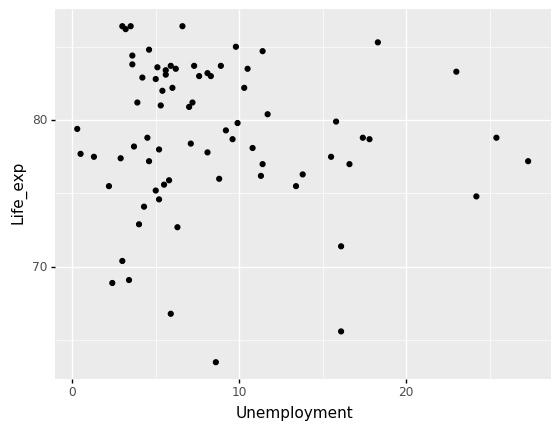

<ggplot: (345707626)> 

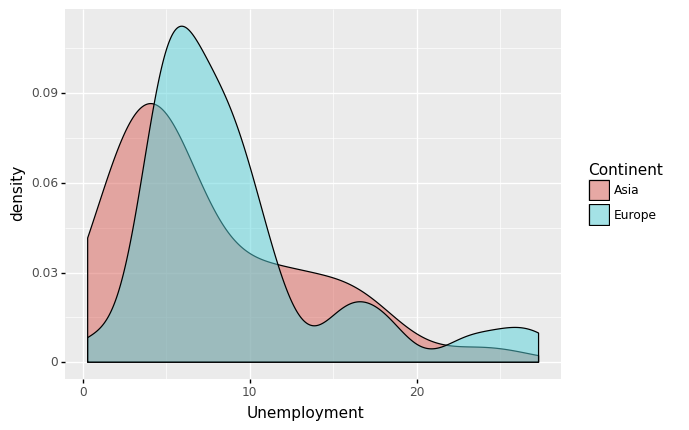

<ggplot: (345707644)>


In [68]:
# GDP vs life expectancy scatter plot
plotUnemploymentVLife = p9.ggplot(euasdata) + p9.aes(x='Unemployment', y='Life_exp') +p9.geom_point() # x VS y

# GDP density plot
plotUnemploymentVCont = p9.ggplot(euasdata) + p9.aes(x='Unemployment', fill='Continent') + p9.geom_density(alpha=0.5) # FILL

# Print plots
print(plotUnemploymentVLife, plotUnemploymentVCont)

Answer: 2. Correct! GDP per capita `both correlates with` life expectancy and differs between the continents.  
Whereas Unemployment doesn't correlate with life expectancy so it can't be confound with it.

### Random sampling
In this exercise, we're going to look at random sampling. You have been provided with a large dataset (athletes) containing the details of a large number of American athletes. For the purposes of this exercise, we are interested in differences between the body Weight of competitors in swimming and athletics. In order to test this, you'll be using a two-sample t-test. However, you will be performing this test on a random sample of the data. By playing with the random subset chosen, you'll see how randomness affects the results. You will need to extract a random subset of athletes from each event in order to run your test. pandas, scipy.stats, plotnine, and random have been loaded into the workspace as pd, stats, p9, and ran, respectively.

In [102]:
athletes = pd.read_csv('data/athletes_rs.csv')

In [103]:
# Define random seed
seed = 1111

# Create two subsets, one for the athletics competitors and one for the swimmers
subsetathl = athletes[athletes['Sport']=='Athletics'].sample(n=30, random_state= seed)
subsetswim = athletes[athletes['Sport']=='Swimming'].sample(n=30, random_state=seed)

# Perform the two-sample t-test
t_result = stats.ttest_ind(subsetathl.Weight, subsetswim.Weight)
print(t_result)

Ttest_indResult(statistic=-1.0821490689611715, pvalue=0.2836649823382498)


In [104]:
# Changingg the random seed
seed = 2222

# Create two subsets, one for the athletics competitors and one for the swimmers
subsetathl = athletes[athletes['Sport']=='Athletics'].sample(n=30, random_state= seed)
subsetswim = athletes[athletes['Sport']=='Swimming'].sample(n=30, random_state=seed)

# Perform the two-sample t-test
t_result = stats.ttest_ind(subsetathl.Weight, subsetswim.Weight)
print(t_result)

Ttest_indResult(statistic=0.3861908355094454, pvalue=0.7007684198050366)


Good work. Now you are familiar with randomizing samples and you can see how choosing different random samples can give you different results. Did you notice that your p-value changed when a different random sample was chosen? `Improving your approach to create a balanced dataset would help avoid this problem.`

### Blocking
We're going to have another look at the same data but, this time, `we'll use blocking to improve our approach`. Like last time, you'll be using a two-sample t-test on athlete Weight within your DataFrame, athletes. This time, however, you will `control for Sex as a blocking factor`, sampling equally from male and female participants. You will need to extract a random subset of athletes from both events to run your test.

In [105]:
seed = 9000

# Create subset blocks
subsetathlm = athletes[(athletes.Sport == "Athletics") & (athletes.Sex == "M")].sample(n=15, random_state= seed)
subsetathlf = athletes[(athletes.Sport == "Athletics") & (athletes.Sex == "F")].sample(n=15, random_state= seed)
subsetswimm = athletes[(athletes.Sport == "Swimming") & (athletes.Sex == "M")].sample(n=15, random_state= seed)
subsetswimf = athletes[(athletes.Sport == "Swimming") & (athletes.Sex == "F")].sample(n=15, random_state= seed)

# Combine blocks
subsetathl = pd.concat([subsetathlm, subsetathlf])
subsetswim = pd.concat([subsetswimm, subsetswimf])

# Perform the two-sample t-test
print(stats.ttest_ind(subsetathl.Weight, subsetswim.Weight))

Ttest_indResult(statistic=-2.9477612234116326, pvalue=0.004605461953501264)


Very good. Your t-test is significant, with a p-value under 0.05. This blocked design has resolved the issue you had in the last exercise. You can see how this type of `blocking approach can be a useful way to improve your experimental design when a **confounding variable** is present`.

### Paired t-test
Think back to the potato field example that we dealt with previously (video). Here, you've been provided with a small DataFrame (podataframe) containing information on 10 Fields. We are interested in potato yield in tons/hectare. For each Field, we have a value for its Yield2018, before the application of a new fertilizer, and its Yield2019, after the application of the new fertilizer. You'll need to perform two t-tests, a standard two-sample test, and a paired t-test. A paired t-test will control for the variation between fields. Do the two tests give the same result?

In [106]:
podataframe = pd.read_csv('data/potatos.csv')

In [107]:
# Perform independent t-test
ttestind = stats.ttest_ind(podataframe.Yield2018, podataframe.Yield2019)
print(ttestind)

# Perform paired t-test
ttestpair = stats.ttest_rel(podataframe.Yield2018, podataframe.Yield2019)
print(ttestpair)

Ttest_indResult(statistic=-0.21660326792826629, pvalue=0.8309534738562026)
Ttest_relResult(statistic=-4.024223770175694, pvalue=0.002998929369297433)


Good work. Recall, the paired test is more sensitive than the independent test and can pick up a difference that the independent test can't detect. This is because the difference within the samples each year `(individual field effect)` is quite large in comparison to the difference between the two years `(effect of treatment)`. `Paired tests are useful when a large variability exists.`

### One-way ANOVA
Let's have another look at some data from our Olympic dataset. How does the Weight of athletes vary between teams from different countries? In this exercise, you're going to use a `one-way ANOVA to check for the presence of significant variation in Weight of Olympic athletes.` You have been provided with the athletes DataFrame, containing details about male athletes from the Team of the United States, France, and China. Here is a set of boxplots of Weight for the athletes from those three countries.

![](images/onewaybox.png)

A one-way ANOVA will allow you to see whether any differences between these groups of values are significant.

In [113]:
athletes = pd.read_csv('data/athletes_owa.csv')

In [114]:
# Create arrays
France_athletes = athletes[athletes.Team == 'France'].Weight
US_athletes = athletes[athletes.Team == 'United States'].Weight
China_athletes = athletes[athletes.Team == 'China'].Weight

# Perform one-way ANOVA
anova = stats.f_oneway(France_athletes, US_athletes, China_athletes)
print(anova)

F_onewayResult(statistic=36.08494654807695, pvalue=3.216668329007853e-16)


Good work! According to this test, significant differences exist between the weights of athletes for each country.

### Two-way ANOVA
Let's have another look at some data from our Olympic dataset. How does the Weight of athletes vary between teams from different countries and of different sexes? In this exercise, you're going to use a two-way ANOVA to check for the presence of significant variation in the Weight of Olympic sprinters. You have been provided with the athletes DataFrame, containing details about athletes from the Team of the United States, and China, from both sexes.

![](images/twowaybox.png)

A two-way ANOVA will allow you to see which of these two factors, Sex and Team, have a significant effect on Weight. pandas, statsmodels, and plotnine have been loaded into the workspace as pd, sm, and p9, respectively.

In [119]:
athletes = pd.read_csv('data/athletes_twa.csv')

In [120]:
# Create model
formula = 'Weight ~ Sex + Team'
model = sm.api.formula.ols(formula, data=athletes).fit()

# Perform ANOVA and print table
aov_table = sm.api.stats.anova_lm(model, typ=2)
print(aov_table)

                 sum_sq      df            F         PR(>F)
Sex       251892.479386     1.0  1443.973427  3.811090e-279
Team         241.272786     1.0     1.383096   2.396282e-01
Residual  909725.383860  5215.0          NaN            NaN


Good work! According to the results of your ANOVA, Sex has a significant effect, while Team has no significant effect. ANOVA is a very powerful method, as it allows us to separate out the effects of multiple factors.

### Two-way ANOVA with interactive effects
Once again, you're going to look at our dataset of Olympic athletes. As in previous exercises, you'll be looking at the variation in athlete Weight. You're going to look at athletes of either Sex competing in one of two Events: the 100 meter and 10,000 meter run. Have a look at these data in the boxplots below.

![](images/intbox.png)

This dataset is provided in your workspace as athletes. An ANOVA will allow you to work out which of these variables affect Weight and whether an interactive effect is present. pandas, statsmodels, and plotnine have been loaded into the workspace as pd, sm, and p9, respectively.

In [124]:
athletes = pd.read_csv('data/athletes_ie.csv')

In [125]:
# Run the ANOVA
model = sm.api.formula.ols('Weight ~ Sex + Event + Sex:Event', data = athletes).fit()

# Extract our table
aov_table = sm.api.stats.anova_lm(model, typ=2)

# Print the table
print(aov_table)

                  sum_sq      df            F        PR(>F)
Sex        141607.485844     1.0  3191.693293  0.000000e+00
Event       83295.483535     1.0  1877.398179  0.000000e+00
Sex:Event    1551.609798     1.0    34.971757  3.680613e-09
Residual   148986.100430  3358.0          NaN           NaN


Good work! Can you interpret the AOV table? Look at the p-values for the effects of Sex, Event, and Sex:Event. Using a standard alpha of 0.05, Sex, Event, and Sex:Event have a significant effect on Weight. This means that both factors influence Weight, and the effect of one factor is dependent on the other.

### Choosing an appropriate test
Let's look at another problem from the Olympic dataset, focusing on the Height of the competitors. Here, you've been provided with athletes data on the Norwegian and Colombian Team for each Sex. With those two factors, you'll have four separate groups. First, look at the boxplots below, then choose an appropriate statistical test.

![](images/choosetestANOVA.png)

Finally, carry out the test.

In [129]:
athletes = pd.read_csv('data/athletes_ie2.csv')

In [130]:
# Create model
formula = 'Height ~ Sex + Team  + Sex:Team'
model = sm.api.formula.ols(formula, data=athletes).fit()

# Perform ANOVA and print table
aov_table = sm.api.stats.anova_lm(model, typ=2)
print(aov_table)

                sum_sq     df           F        PR(>F)
Sex       11975.530932    1.0  159.038723  7.512939e-33
Team      12274.160018    1.0  163.004609  1.506805e-33
Sex:Team    107.335230    1.0    1.425445  2.329344e-01
Residual  50149.444322  666.0         NaN           NaN


Nice. According to the results of your two-way ANOVA, both of the factors, Sex and Team, have a significant effect on Height. However, no significant interactive effect is present.

---
## Sample size, Power analysis, and Effect size
In this chapter, you will focus on ways to avoid drawing false conclusions, whether false positives (type I errors) or false negatives (type II errors). Central to avoiding false negatives is understanding the interplay between sample size, power analysis, and effect size.

### Bonferroni vs Šídák correction
![](images/bonf-vs-sidax.png)

### Bonferroni correction - For Multiple Samples Case
Improved nutrition and healthcare has lead to increased human heights in most societies over the past century. But is this trend also reflected amongst elite athletes? To examine this, we'll be looking at another slice from our Olympic dataset and performing multiple tests.

You have been provided with the athletes dataset containing information about **American male Olympic athletes from three years** (**Here's the dependency**): 1924, 1952, and 2016. You will perform two-sample t-tests to compare the three timepoints, seen in boxplots. `Between which times do significant differences exist?` As you'll be performing multiple non-independent tests, you will need to perform Bonferroni correction on the results. 

![](images/bonf.png)

In [136]:
athletes = pd.read_csv('data/athletes_bf.csv')

In [141]:
# Perform three two-sample t-tests 
t_result_1924v2016= stats.ttest_ind(athletes[athletes.Year==1924].Height, athletes[athletes.Year==2016].Height)
t_result_1952v2016= stats.ttest_ind(athletes[athletes.Year==1952].Height, athletes[athletes.Year==2016].Height)
t_result_1924v1952= stats.ttest_ind(athletes[athletes.Year==1924].Height, athletes[athletes.Year==1952].Height)

# Create an array of p-value results
pvals_array = [t_result_1924v2016[1], t_result_1952v2016[1], t_result_1924v1952[1]]
print(pvals_array)

# Perform Bonferroni correction
adjustedvalues = sm.stats.multitest.multipletests(pvals_array, alpha=0.05, method='b')
print(adjustedvalues)

[2.0995273280295586e-16, 4.484419167217926e-05, 0.00013562429334889784]
(array([ True,  True,  True]), array([6.29858198e-16, 1.34532575e-04, 4.06872880e-04]), 0.016952427508441503, 0.016666666666666666)


Nice. See how the Bonferroni correction affects your values? This correction method is quite conservative.  

### Šídák correction
We're looking at how the Height of Olympic athletes from the athletes dataset has changed over time. In this exercise, we're considering three events, the 100 meter, the High Jump, and the Marathon. `You'll be examining the correlation between Height and Year separately for each Event`. As you did before, you'll need to correct for multiple hypothesis tests, but, `since these tests are independent, you can use the less-strict Šídák correction`.

![](images/sidex.png)

In [145]:
athletes = pd.read_csv('data/athletes_sx.csv')

In [146]:
# Perform Pearson correlations
pearson100 = stats.pearsonr(athletes[athletes.Event == '100 meters'].Height, athletes[athletes.Event == '100 meters'].Year)
pearsonHigh = stats.pearsonr(athletes[athletes.Event == 'High Jump'].Height, athletes[athletes.Event == 'High Jump'].Year)
pearsonMara = stats.pearsonr(athletes[athletes.Event == 'Marathon'].Height, athletes[athletes.Event == 'Marathon'].Year)

# Create array of p-values
pvals_array = [pearson100[1], pearsonHigh[1], pearsonMara[1]]
print(pvals_array)

# Perform Šídák correction
adjustedvalues=  sm.stats.multitest.multipletests(pvals_array, method= 's')
print(adjustedvalues)

[0.00991263413561775, 9.84838426935881e-07, 2.0317017047996917e-05]
(array([ True,  True,  True]), array([2.94440955e-02, 2.95451237e-06, 6.09498128e-05]), 0.016952427508441503, 0.016666666666666666)


### Exploring sample size
Now we'll explore the effect of sample size on the results of statistical tests. Here, we'll be comparing the Weight of American Athletics and Swimming competitors in the athletes dataset. The boxplots show the difference between these two groups.

![](images/samp.png)

Using a defined seed and varying sample sizes, you will perform t-tests comparing the Weight of samples from both Sports. 

In [151]:
athletes = pd.read_csv('data/athletes_ss.csv')

In [153]:
# Create subset with defined random seed and perform t-test
subset = athletes.sample(n=1000, random_state= 1007)
print(stats.ttest_ind(subset[subset.Sport == "Athletics"].Weight, subset[subset.Sport == "Swimming"].Weight))

# Create sample with defined random seed and perform t-test
subset = athletes.sample(n=200, random_state=1007)
print(stats.ttest_ind(subset[subset.Sport == "Athletics"].Weight, subset[subset.Sport == "Swimming"].Weight))

# Create sample with defined random seed and perform t-test
subset = athletes.sample(n=50, random_state= 1007)
print(stats.ttest_ind(subset[subset.Sport == "Athletics"].Weight, subset[subset.Sport == "Swimming"].Weight))

Ttest_indResult(statistic=-4.5957029380768635, pvalue=4.865150456250805e-06)
Ttest_indResult(statistic=-2.015353197866729, pvalue=0.045219679216043834)
Ttest_indResult(statistic=-0.4128822477487438, pvalue=0.6815314551740592)


Great! Look how smaller samples affected your p-value. With sample sizes of 1000, 200 and 50, you got p-values of 0.0000045, 0.045 and 0.68, respectively. The smallest sample size didn't give a significant result. Now you see how much difference sample size can make.

### Sample size for a t-test
Now that we've seen the importance of sample size, let's have another look at the same athletes dataset and see if we can determine the sample size we would need to get a significant result.

![](images/samp.png)

The boxplot shows the difference in body weight between sports, using all 2830 rows from the athletes dataset. The difference between the groups looks quite small. Determine the sample size we would need to have an 80% chance of detecting a small (0.4) difference between these two samples. statsmodels.stats.power and pandas have been loaded for you as pwr and pd.

In [156]:
# Set parameters
effect = 0.4
power = 0.8
alpha = 0.05

# Calculate ratio
swimmercount = float(len(athletes[athletes.Sport == "Swimming"]))
athletecount = float(len(athletes[athletes.Sport == "Athletics"]))
ratio = swimmercount/athletecount

# Initialize analysis and calculate sample size
analysis = pwr.TTestIndPower()
ssresult = analysis.solve_power(effect_size=effect, power=power, alpha=alpha, nobs1=None, ratio=ratio)
print(ssresult)

201.21000641384163


Good work. This result is in keeping with what you saw in the last exercise, where a sample size of around 200 yields results that hover around statistical significance.

This value is fort **both control and experimental groups** (200 in each of the groups).

### Efect Size aka Signal To Noise Ratio

### Effect size for a t-test
Now, we're going to have a look at effect sizes. We are examining the same slice from the atheletes dataset, comparing the body weights of competitors from swimming and athletics events. The boxplots are included.

![](images/samp.png)

`You're going to calculate the effect sizes we are able to detect` for a couple of different sampling strategies. First, you'll determine the smallest effect size detectable using the complete dataset. Then, in Step 2, you'll determine the size effect we could detect using 300 samples from each Sport.

**Calculating minimum detectable effect size**

**For the whole dataset**

In [161]:
# Set parameters
alpha = 0.05
power = 0.8
ratio = float(len(athletes[athletes.Sport == "Swimming"])) / len(athletes[athletes.Sport == "Athletics"])
samp_size = len(athletes[athletes.Sport == "Athletics"])

# Initialize analysis & calculate sample size
analysis = pwr.TTestIndPower()
esresult = analysis.solve_power(effect_size = None, 
                                power = power, 
                                nobs1 = samp_size, 
                                ratio = ratio, 
                                alpha = alpha)
print(f'ratio:{ratio}\n')
print(f'minimum effect size: {esresult}')

ratio:0.3255269320843091

effect size: 0.12239214635469928


**For 300 samples with equal proportion per group (ratio=1)**

In [162]:
# Set parameters
alpha = 0.05
power = 0.8
ratio = 1
samp_size = 300 # for each group

# Initialize analysis & calculate sample size
analysis = pwr.TTestIndPower()
esresult = analysis.solve_power(effect_size=None, power=power, nobs1=samp_size, ratio=ratio, alpha=alpha)
print(f'ratio:{ratio}\n')
print(f'minimum effect size: {esresult}')

ratio:1

effect size: 0.22911649250766375


### Calculating actual effect size

### Computing Cohen's d
Now, using the same comparison of Weight difference between Sports, let's calculate the actual effect size for this comparison. As a reminder, these data are summarized in the boxplot below.

![](images/samp.png)

Using the formula seen in the previous video, calculate Cohen's d for the difference in Weight between each Sport. Your data is contained in athletes.

In [166]:
# Create series
athl = athletes[athletes.Sport == "Athletics"].Weight
swim = athletes[athletes.Sport == "Swimming"].Weight

# Calculate difference between means and pooled standard deviation
diff = swim.mean() - athl.mean()
pooledstdev = math.sqrt((athl.std()**2 + swim.std()**2)/2 )

# Calculate Cohen's d
cohend = diff / pooledstdev
print(cohend)

0.42144949362633766


Great! This is a moderate sized effect size. As the effect size is bigger than the minimum effect size calculated in the last exercise, you would expect that the parameters from the last exercise would allow you to detect a difference like this.

### Effect size for a Fisher exact test
In this exercise, you'll use the athletes dataset to examine whether American athletes are more successful in athletics or in swimming events. For the purposes of this exercise, an extra column has been added to the dataset, MedalTF, which gives a True or False value for whether each athlete won any type of medal. First, you'll cross-tabulate MedalTF with Sport. Then you'll perform a Fisher exact test. Finally, you'll examine the significance and effect size of this result.

In [167]:
athletes = pd.read_csv('data/athletes.csv')

In [169]:
# Create a table of cross-tabulations
table = pd.crosstab(athletes.MedalTF,athletes.Sport)
print(table)

# Perform the Fisher exact test
fisher = stats.fisher_exact(table, alternative='two-sided')

# Print p-value
print("p-value of test: " + str(round(fisher[1], 5))  )

# Print odds ratio  
## EFFECT SIZE
print("Odds ratio between groups: " + str(round(fisher[0], 1))  )

Sport    Athletics  Swimming
MedalTF                     
False         2131       556
True          1071      1066
p-value of test: 0.0
Odds ratio between groups: 3.8


Great work! This p-value is well below a standard value for alpha, making it significant. Furthermore, the effect size is large.

### Effect sizes for Pearson correlation
Now we're going to look at effect sizes for Pearson correlations. In a previous exercise, we used Pearson correlation to examine the link between Weight and Height for athletes from our Olympic dataset. Now, we're going to focus a single event, the 10,000 meter run, and compare the results we obtain for Pearson tests of correlation for competitors from two Teams, Kenya (ken DataFrame) and Ethiopia (eth DataFrame). Which has a higher effect strength? These data are graphed below as scatterplots. scipy and pandas have been loaded as sp and pd.

![](images/ken10k.png)
![](images/eth10k.png)

In [174]:
ken = pd.read_csv('data/athletes_ken.csv')

In [175]:
eth = pd.read_csv('data/athletes_eth.csv')

In [176]:
# Perform Pearson correlation
pearsonken = stats.pearsonr(ken.Weight, ken.Height)
print(pearsonken)

# Perform Pearson correlation
pearsoneth = stats.pearsonr(eth.Weight, eth.Height)
print(pearsoneth)

(0.7453064505495951, 6.497110521502736e-07)
(0.3728450639500468, 0.038851120305329265)


Nice. Look at the Pearson correlation coefficient (pearson[0]) you have obtained in each case. The Kenyan dataset gives a higher value than that obtained for the Ethiopian samples. This makes sense, as the scatterplot for the former looks much less noisy.

### Power analysis for a t-test
Now we're going to have another look at the same example, drawn from our Olympic dataset (Weight difference between Sports). A random subset of 100 samples from each group in this data yields these boxplots.

![](images/samp.png)

Knowing the effect size of the difference between these two groups (see the relevant exercise for a refresher), you need to work out `what the odds are that your t-test will pick up this difference`. Your data is contained in athletesample.

In [177]:
# Set parameters
effect_size = 0.42145
alpha = 0.05
samp_size = 100
ratio = 1

# Initialize analysis & calculate power
analysis = pwr.TTestIndPower()
pwresult = analysis.solve_power(effect_size=effect_size, power=None, nobs1=samp_size, ratio=ratio, alpha=alpha)
print(pwresult)

0.8427090697725385


Great! Now you know how to deal with all of the parameters of solving power, sample size, alpha and effect size.

### Interpreting power analyses
You are planning to run a t-test, comparing the production of 20 potato fields treated with fertilizer A versus 20 treated with fertilizer B. The production data for these fields are seen below:

![](images/fertmcq.png)

You perform a two-sample t-test, comparing the production of the fields treated with fertilizer A versus those treated with fertilizer B. You obtain the following result:

Ttest_indResult(statistic=-1.4077611103176186, pvalue=0.16733016968700729)

Using an alpha of 0.05, you classify the result of the t-test as not significant, indicating no difference between the fertilizers. You then perform a power analysis, using an effect_size of 0.6 (this is the smallest effect size that you would consider worthwhile), an alpha of 0.05 and the same sample size (20 fields each treatment) used for the t-test.

You obtain the following result for your power: 0.45603406363350196

Which of the following interpretations best fits your data?


1. The result from your t-test is certainly a type I error.
2. The result from your t-test is certainly a type II error.
3. The result from your t-test may be a type II error or may be a true negative and the data available are not sufficient to distinguish these possibilities.
4. There is certainly no difference between the fertilizers.

Answer: 3. Correct! While the t-test returned a negative, our power analysis indicates that this test may not be capable of detecting a difference of interest. We are thus unable to draw a firm conclusion.

---
## Testing Normality: Parametric and Non-parametric Tests
In this final chapter, you will examine the assumptions underlying statistical tests and learn about how that influences your experimental design. This will include learning whether a variable follows a normal distribution and when you should use non-parametric statistical tests like the Wilcoxon rank-sum test and the Spearman correlation test.

### Exploring distributions with summary stats
Let's return to our UN demographic data, countrydata, to examine distributions using summary statistics. For each Country, you have information about the GDP per capita in USD (GDP_per_cap) and the unemployment rate (Unemployment). How close to normality is each?

For a perfect normal distribution, the mean, median, and mode will be identical, and the density plot will show a classic, symmetrical bell curve.

In [182]:
countrydata = pd.read_csv('data/euasdata2.csv')

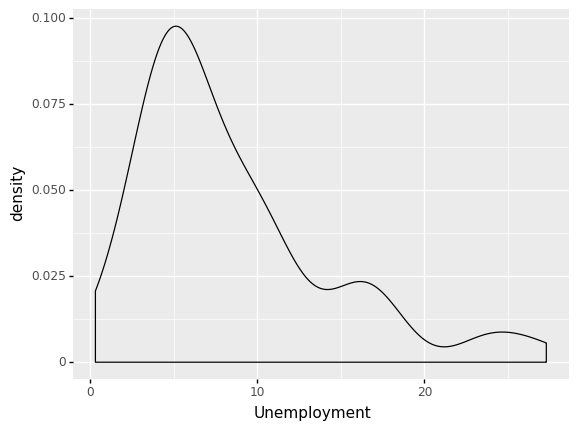

<ggplot: (346500398)>
8.458108108108108
6.449999999999999
0     3.0
1     3.6
2     4.6
3     5.0
4     5.2
5     5.6
6     5.9
7     8.1
8    11.4
9    16.1
dtype: float64


In [183]:
# Print density plot, mean, median, and mode of Unemployment
print(p9.ggplot(countrydata)+ p9.aes(x='Unemployment')+ p9.geom_density())
print(countrydata.Unemployment.mean())
print(countrydata.Unemployment.median())
print(countrydata.Unemployment.mode())

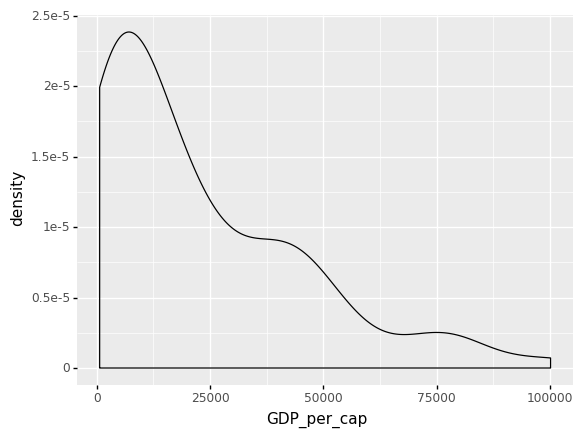

<ggplot: (346894020)>
22339.863513513512
14043.900000000001
0        623.2
1        648.0
2        724.5
3       1106.4
4       1207.9
        ...   
69     73653.4
70     74185.5
71     78586.4
72     80831.1
73    100160.8
Length: 74, dtype: float64


In [184]:
# Print density plot, mean, median, and mode of GDP per capita
print(p9.ggplot(countrydata)+ p9.aes(x='GDP_per_cap')+ p9.geom_density())
print(countrydata.GDP_per_cap.mean())
print(countrydata.GDP_per_cap.median())
print(countrydata.GDP_per_cap.mode())

Nice work. Neither of these variables are normally distributed. Note that the mean, median, and mode are different each time and that a couple of modes are present. GDP per capita departs farther from normality than Unemployment.

### Q-Q plot
Another way to examine the normality of a distribution is with a Q-Q (quantile-quantile) plot. For this exercise, you will create a Q-Q plot for the country-level Unemployment data you saw in the last exercise (available in your workspace as countrydata). `The Q-Q plot compares the theoretical quantiles expected under a normal distribution to the actual observed values (ordered).` When a distribution is normally distributed, you will see a straight line. The more crooked the line is, the farther the distribution departs from normality.

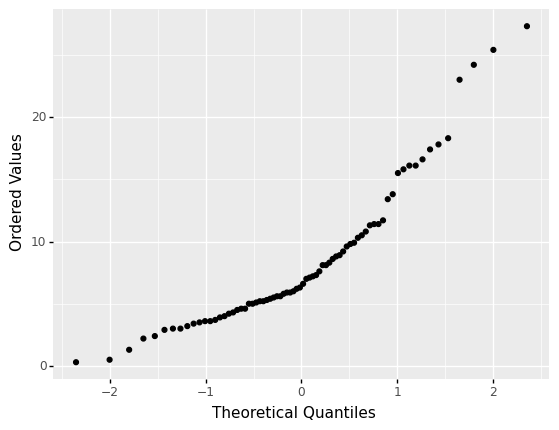

<ggplot: (343323624)>


In [185]:
# Calculate theoretical quantiles
tq = stats.probplot(countrydata.Unemployment, dist='norm')

# Create Dataframe
df = pd.DataFrame(data= {'Theoretical Quantiles': tq[0][0], 
                         "Ordered Values": countrydata.Unemployment.sort_values() })

# Create Q-Q plot
print(p9.ggplot(df)+ p9.aes('Theoretical Quantiles', "Ordered Values") +p9.geom_point())

Great work! Look at the curve on the graph. This variable isn't normally distributed.

### Shapiro-Wilk test
Previously, you looked at country-level Unemployment and GDP per capita (GDP_per_cap) data (available in your workspace as countrydata). Now, you will use a Shapiro-Wilk test to examine whether the distribution of values seen in these samples, as seen in the Q-Q plots below, departs significantly from the normal distribution. This test tells us how closely a given sample fits the patterns expected from a normal distribution.

![](images/qq-both.png)

In [186]:
# Perform Shapiro-Wilk test on Unemployment and print result
shapiroUnem = stats.shapiro(countrydata.Unemployment)
print(shapiroUnem)

# Perform Shapiro-Wilk test on Unemployment and print result
shapiroGDP = stats.shapiro(countrydata.GDP_per_cap)
print(shapiroGDP)

ShapiroResult(statistic=0.8757604360580444, pvalue=2.85947112388385e-06)
ShapiroResult(statistic=0.8402283191680908, pvalue=1.835790044424357e-07)


Nice work. Both distributions are non-normal. Compare the test statistic at index[0] for the two tests. The GDP per capita value is lower, which makes sense if you think about how much more skewed those figures were.

### Choosing tests and normality
In which of the following situations is it acceptable to use a parametric test to compare group means, like a t-test or ANOVA?
1. When looking for significant variation in any continuous variable, irrespective of the shape of the distribution.
2. Only when the variable of interest is normally distributed.
3. When comparing normally distributed samples or non-normally distributed samples with large sample sizes.
4. When looking for significant variation in any discrete variable.

Answer: 3. Correct! While the t-test and ANOVA are designed with normal distributions in mind, they can be used for somewhat non-normal distributions where sample sizes are large enough.

### Wilcoxon rank-sum test
[In a previous exercise](#two-sample-t-test), you compared the sex ratio of European countries (Europe_Sex_ratio) with the sex ratio of Asian countries (Asia_Sex_ratio). These data are shown below.

![](images/euassr.png)

You used a t-test to compare these two samples and found a significant difference (t_result). However, given that these samples are not normally distributed, a Wilcoxon rank-sum test would be more appropriate. Does the sex ratio differ between continents?

In [187]:
euasdata = pd.read_csv('data/euasdata1.csv')

In [193]:
Asia_Sex_ratio = euasdata[euasdata.Continent == 'Asia'].Sex_ratio
Europe_Sex_ratio = euasdata[euasdata.Continent == 'Europe'].Sex_ratio

In [195]:
# Perform the two-sample t-test
t_result= stats.ttest_ind(Europe_Sex_ratio, Asia_Sex_ratio)
print(t_result)

# Perform Wilcoxon rank-sum test
wilc = stats.ranksums(Europe_Sex_ratio, Asia_Sex_ratio)
print(wilc)

Ttest_indResult(statistic=-3.158577029594624, pvalue=0.0022464114650919908)
RanksumsResult(statistic=-3.7847900837297703, pvalue=0.00015383837364106627)


Great! Look at the p-values from the Wilcoxon test. Note that they are actually lower (more significant) than those for the t-test. This is because the rank-sum test is less sensitive to outliers.

### Wilcoxon signed-rank test
Here, you've been provided with a small DataFrame (podataframe) containing information on 15 Fields. We are interested in potato yield in tons/hectare, as seen in previous lessons. For each Field, we have a value for Yield2018, before the application of a new fertilizer, and Yield2019, after the application of the new fertilizer. However, the variation between fields is very large and the difference between the years seems small, as seen below.

![](images/wilcbox.png)

A paired t-test has been performed and its result is stored as ttestpair. A Shapiro-Wilks test has been performed on each Year's yield, shap2018 and shap2019. Does the yield differ significantly between years? scipy.stats is loaded into the workspace as stats.

In [106]:
podataframe = pd.read_csv('data/potatos.csv')

In [198]:
# Perform paired t-test
ttestpair = stats.ttest_rel(podataframe.Yield2018, podataframe.Yield2019)
print(ttestpair)

# Perform Shapiro-Wilk test on Unemployment and print result
shap2018 = stats.shapiro(podataframe.Yield2018)
shap2019 = stats.shapiro(podataframe.Yield2019)
print(shapiroUnem)

# Perform Wilcoxon Signed-Rank test
wilcsr = stats.wilcoxon(podataframe.Yield2018, podataframe.Yield2019)
print(wilcsr)

Ttest_relResult(statistic=-4.024223770175694, pvalue=0.002998929369297433)
ShapiroResult(statistic=0.8757604360580444, pvalue=2.85947112388385e-06)
WilcoxonResult(statistic=1.0, pvalue=0.00390625)


Nice work. Note that both of your Shapiro-Wilks tests gave significant results, indicating non-normal distributions. The Wilcoxon test gives a higher p-value for the same data, due to its lower sensitivity. However, due to the low sample sizes and non-normal distributions, the Wilcoxon test is a better choice of test for this dataset.

### Parametric vs non-parametric tests
Once again we'll be using the Olympic dataset. Here we're going to compare the Height of athletes from both the Norwegian and Chinese 1996 Teams. The data are provided in your workspace as athletes. Do they differ?

![](images/olyno2004.png)

Do these two distributions look normal or not? First, we'll test whether these sets of samples follow a normal distribution, via a couple of Shapiro-Wilks tests. Then we'll choose what statistical test to use. Finally, we'll test the difference between the Norwegian and Chinese samples.

In [203]:
athletes = pd.read_csv('data/athletes_p_np.csv')

In [204]:
# Separate the heights by country
NorwayHeights = athletes[athletes['Team'] == "Norway"].Height
ChinaHeights = athletes[athletes['Team'] == "China"].Height

# Shapiro-wilks test on the heights
print(stats.shapiro(NorwayHeights)[1])
print(stats.shapiro(ChinaHeights)[1])

0.12311235070228577
0.026477865874767303


Question
What kind of statistical test should you use to compare these values?

1. A two-sample t-test
2. A one-sample t-test
3. A Wilcoxon rank-sum test
4. A Wilcoxon signed-rank test

Answer: 3. One sample is normal while the other isn't.

In [205]:
# Perform the Wilcoxon rank-sum test
wilc = stats.ranksums(NorwayHeights, ChinaHeights)
print(wilc)

RanksumsResult(statistic=3.8752175150628543, pvalue=0.00010652949777206396)


Great work! With a p-value less than 0.05, this difference is statistically significant. Now you understand how to compare the distributions of non-normally distributed groups.

### Spearman correlation
We're going to return to our Olympic dataset, where, as in previous exercises, we'll be looking at the correlation between Height and Weight amongst athletics competitors since 2000. This relationship is seen below for both men (athletesM DataFrame) and women (athletesF DataFrame).

![](images/spearmannHW.png)

Note that the trend seen in each panel, represented by the line, isn't perfectly linear, particularly for the female samples. How will this affect correlation test results?

In [207]:
athletesF = athletes[athletes.Sex == 'F']
athletesM = athletes[athletes.Sex == 'M']

In [208]:
# Perform Pearson and Spearman correlations
pearcorr = stats.pearsonr(athletesF.Height, athletesF.Weight)
print(pearcorr)
spearcorr = stats.spearmanr(athletesF.Height, athletesF.Weight)
print(spearcorr)

(0.6826317766125134, 5.502536122994011e-11)
SpearmanrResult(correlation=0.7472121201081829, pvalue=7.224341517192893e-14)


In [209]:
# Perform Pearson and Spearman correlations
pearcorr = stats.pearsonr(athletesM.Height, athletesM.Weight)
print(pearcorr)
spearcorr = stats.spearmanr(athletesM.Height, athletesM.Weight)
print(spearcorr)

(0.8002332216424362, 4.706877970506907e-09)
SpearmanrResult(correlation=0.8743215958203556, pvalue=3.261909972561873e-12)


Good work! In both cases, a strong correlation is found, as evidenced by the high correlation coefficients at index[0] of each output. Notice how the Spearman correlation outperforms the Pearson correlation (by finding stronger correlation) in both cases, particularly among the female samples, which show a non-linear trend. `Non-parametric Spearman correlation works well for non-linear relationships.`

### Choosing the correct correlation test
Think back to our potato growing examples. Here, you've been provided with a DataFrame (podataframe) containing information data on potato Production and Fertilizer used. We are interested in a possible correlation between these two values. The relationship between these two variables is seen below. scipy.stats is loaded into the workspace as stats.

![](images/corrshape.png)

### Question
What type of correlation test is best suited to examining the possible link between Fertilizer and Production?

1. Pearson correlation test
2. Spearman correlation test
3. Student's t-test
4. Wilcoxon rank-sum test

Answer: 2. 

In [214]:
podataframe = pd.read_csv('data/potatos_prod.csv')

In [215]:
# Perform Spearman correlation
spearcorr = stats.spearmanr(podataframe.Production, podataframe.Fertilizer)
print(spearcorr)

SpearmanrResult(correlation=0.9950541817171439, pvalue=7.112594135852277e-60)


Good work! These two variables are strongly correlated, as seen by the very high correlation coefficient, over 0.99. Spearman correlation is a useful way to capture these non-linear relationships.